# Machine Learning
# Assignment 6: PCA

Please write your full name here
- **Name** : "Somaia Ahmed"

## Instructions
- Please place your code where you're asked to. Do not change any other code.
- Submit the notebook with your solutions and keep the cell outputs.
- Please name your notebook in the following format "assignment6_FirstnameLastname.ipynb"
- Late submissions will be penalized.

# PCA

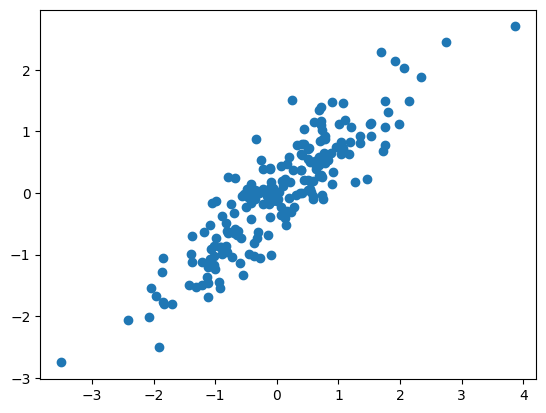

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
## Data
rng = np.random.RandomState(42)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal');

## Question 1

Write your own PCA function that will return:
* The sorted eigenvectors of all principal components
* The corresponding eigenvalues
* The transformed data
- Function takes in the data only
    - You can use np.linalg.eig

Note, please make sure that the data is centered before transformation (i.e., the sample
mean subtracted out) but not normalized.

In [ ]:
#### YOUR FUNCTION
def pca(X):
  # centered the data
  X_centered = X - np.mean(X, axis=0)

  cov_matrix = np.cov(X_centered, rowvar=False)
  eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

  sorted_indices = np.argsort(eigenvalues)[::-1]
  sorted_eigenvalue = eigenvalues[sorted_indices]
  sorted_eigenvectors = eigenvectors[:, sorted_indices]

  X_reduced = np.dot(X_centered, sorted_eigenvectors)


  return sorted_eigenvectors, sorted_eigenvalue, X_reduced

## Question 2
- Apply your PCA function to the data given above
- print the pca eigenvalues
- plot the transformed data
- plot the PCA eigenvectors over the ORIGINAL data with the correct directions!

In [ ]:
## Apply your function
sorted_eigenvectors, sorted_eigenvalue, X_transformed = pca(X)

In [ ]:
print("Eigenvalues are: ", sorted_eigenvalue)

Eigenvalues are:  [1.82927343 0.10246373]


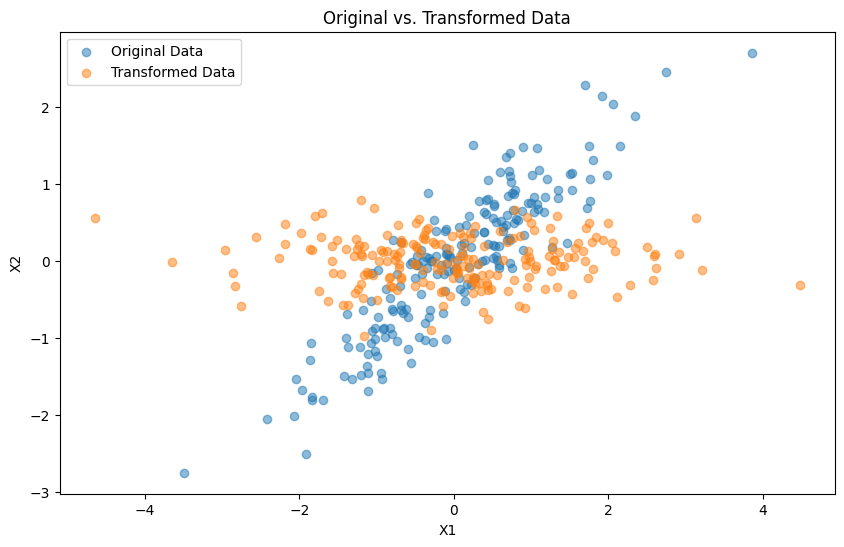

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original Data')
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], alpha=0.5, label='Transformed Data')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original vs. Transformed Data')
plt.legend()
plt.show()

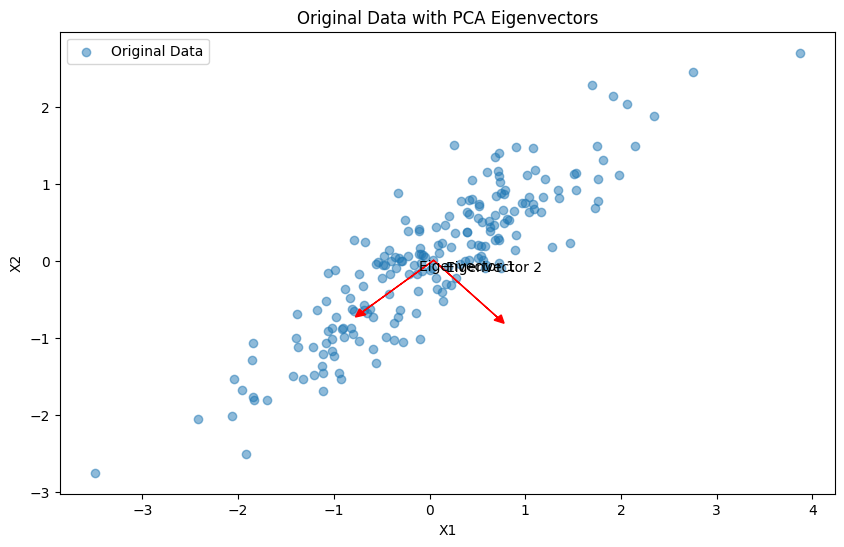

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], alpha=0.5, label='Original Data')
origin = np.mean(X, axis=0)

for i in range(sorted_eigenvectors.shape[1]):
    eigenvector = sorted_eigenvectors[:, i]
    plt.arrow(origin[0], origin[1], eigenvector[0], eigenvector[1], head_width=0.1, head_length=0.1, fc='r', ec='r')
    plt.text(origin[0] + eigenvector[0] * 0.2, origin[1] + eigenvector[1] * 0.2, f'Eigenvector {i+1}')

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Original Data with PCA Eigenvectors')
plt.legend()
plt.show()

## Question 3

- Apply sklearn's PCA function to the same data
- print the pca eigenvalues

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)

print("Sklearn PCA Eigenvalues (Explained Variance):", pca.explained_variance_)


Sklearn PCA Eigenvalues (Explained Variance): [1.82927343 0.10246373]
